<!--Header-->
<div id="header" class="fluid-row" style="max-width: 910px; margin-left: auto; margin-right: auto">
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 30px;">Estudios de Informática, Multimedia y Telecomunicaciones</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #73EDFF;padding: 5px 15px;">
        <div class="col-md-6">
            <div style="text-align:center;"> </div>
        </div>
    </div>
</div>
<!--/Header-->

# 75.584 Minería de datos
### PEC 2


Estudiante: Erika Martínez Soria

In [1]:
#Importar las librerias

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from matplotlib import gridspec
from scipy.stats import pearsonr

In [2]:
# Accedemos al fichero hawks.csv
filename = 'hawks.csv'

hawksData = pd.read_csv(filename)
hawksData.head(5)

,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN
1,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN
3,9,23,1992,10:50,,745-49508,CH,I,F,265.0,470.0,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN
4,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,170.0,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN


Revisamos la descripción de las variables de interés que vamos a utilizar en la creación y ejecución de los modelos no supervisados. 


+ **Species** Especie del halcón. 
+ **Wing** Tamaño de las alas.
+ **Weight** Peso del halcón
+ **Culmen** Culmen del halcón.
+ **Hallux** Tamaño del dedo gordo o grueso de la pata del halcón. 

# Exploración del conjunto de datos
Verificamos la estructura del juego de datos principal.

Obtenemos el numero de filas y columnas del conjunto de datos.

In [1]:
hawksData.shape

NameError: name 'hawksData' is not defined

Vemos que tenemos **19** variables y **908** registros


A continuacion, tenemos el número de columnas y sus nombres.

In [4]:
hawksData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         908 non-null    int64  
 1   Day           908 non-null    int64  
 2   Year          908 non-null    int64  
 3   CaptureTime   908 non-null    object 
 4   ReleaseTime   907 non-null    object 
 5   BandNumber    908 non-null    object 
 6   Species       908 non-null    object 
 7   Age           908 non-null    object 
 8   Sex           332 non-null    object 
 9   Wing          907 non-null    float64
 10  Weight        898 non-null    float64
 11  Culmen        901 non-null    float64
 12  Hallux        902 non-null    float64
 13  Tail          908 non-null    int64  
 14  StandardTail  571 non-null    float64
 15  Tarsus        75 non-null     float64
 16  WingPitFat    77 non-null     float64
 17  KeelFat       567 non-null    float64
 18  Crop          565 non-null    

Las variables de interes (Wing, Weight, Culmen, Hallux) no tienen completo los datos para los 908 registros.
La variable *Wing* tiene 907 registros, *Weight* tiene 898, *Culmen* tiene 901 y *Hallux* tiene 902 registros.

# Preprocesamiento y gestión de características
## Limpieza
El siguiente paso será la limpieza de datos, mirando si hay valores vacíos o nulos, y outliers

In [5]:
print("NA")
hawksData.isnull().sum()

NA


Month             0
Day               0
Year              0
CaptureTime       0
ReleaseTime       1
BandNumber        0
Species           0
Age               0
Sex             576
Wing              1
Weight           10
Culmen            7
Hallux            6
Tail              0
StandardTail    337
Tarsus          833
WingPitFat      831
KeelFat         341
Crop            343
dtype: int64

Como ya observamos en el anterior apartado las variables de interes tienen registros nulos. *Wing* tiene 1 registro nulo, *Weight* tiene 10, *Culmen* tiene 7 y *Hallux* tiene 6 registros nulos. 

Revisamos mas en detalle los datos de las cuatro variables con el resumen estadistico.  

### Wing
Revisamos algunos datos e informacion de la variable *Wing*

In [6]:
#Resumen estadístico del la variable Wing
hawksData["Wing"].describe()

count    907.000000
mean     315.637486
std       95.277591
min       37.200000
25%      202.000000
50%      370.000000
75%      390.000000
max      480.000000
Name: Wing, dtype: float64

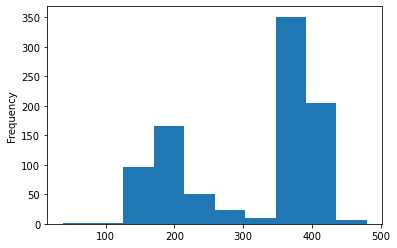

In [7]:
#Histograma de la varible Wing
ax = hawksData["Wing"].plot.hist()

La distribucion de la variable *Wing* es bimodal. 

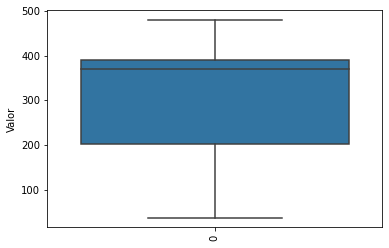

In [8]:
#Boxplot
df=hawksData['Wing']

sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.ylabel('Valor')
plt.show()

#https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce 
#https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn 

Parece no haber outliers en la variable *Wing*.

Ahora imputamos los registros nulos de la variable Wing con la mediana de los datos. 

In [9]:
hawksData['Wing'].fillna(hawksData['Wing'].median(), inplace=True)

print("Numero actualizado de nulos en la variable Wing: " + str(hawksData['Wing'].isnull().sum()))

Numero actualizado de nulos en la variable Wing: 0


Con la media imputada, ahora ya no existen valores nulos en la variable *Wing* .

### Weight
Revisamos algunos datos e informacion de la variable *Weight*

In [10]:
#Resumen estadístico del la variable Weight
hawksData["Weight"].describe()

count     898.000000
mean      772.080178
std       462.311760
min        56.000000
25%       185.000000
50%       970.000000
75%      1120.000000
max      2030.000000
Name: Weight, dtype: float64

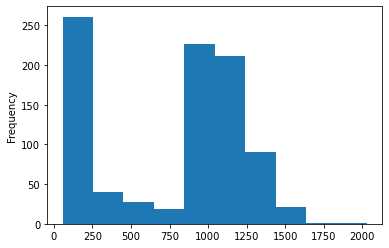

In [11]:
#Histograma de la varible Weight
ax = hawksData["Weight"].plot.hist()

La distribucion de la variable *Weight* es bimodal.

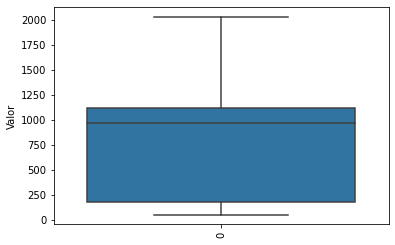

In [12]:
#Boxplot
df=hawksData['Weight']

sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.ylabel('Valor')
plt.show()

No hay outliers en la variable *Weight*

Ahora imputamos los registros nulos de la variable Weight con la mediana de los datos.

In [13]:
hawksData['Weight'].fillna(hawksData['Weight'].median(), inplace=True)

print("Numero actualizado de nulos en la variable Weight: " + str(hawksData['Weight'].isnull().sum()))

Numero actualizado de nulos en la variable Weight: 0


### Culmen
Revisamos algunos datos e informacion de la variable *Culmen*

In [14]:
#Resumen estadístico del la variable Culmen
hawksData["Culmen"].describe()

count    901.000000
mean      21.801498
std        7.284175
min        8.600000
25%       12.800000
50%       25.500000
75%       27.300000
max       39.200000
Name: Culmen, dtype: float64

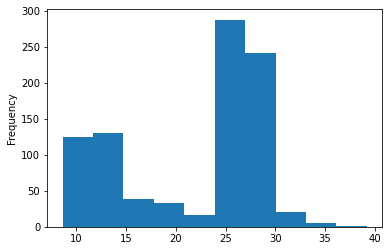

In [15]:
#Histograma de la varible Culmen
ax = hawksData["Culmen"].plot.hist()

La distribucion de la variable *Culmen* es bimodal.

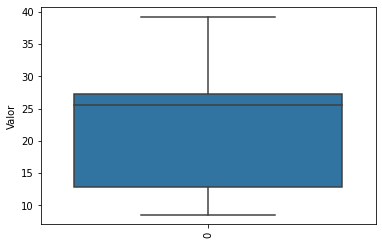

In [16]:
#Boxplot
df=hawksData['Culmen']

sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.ylabel('Valor')
plt.show()

No hay outliers en la variable *Culmen*

Imputamos los registros nulos de la variable Culmen con la mediana de los datos.

In [17]:
hawksData['Culmen'].fillna(hawksData['Culmen'].median(), inplace=True)

print("Numero actualizado de nulos en la variable Culmen: " + str(hawksData['Culmen'].isnull().sum()))

Numero actualizado de nulos en la variable Culmen: 0


### Hallux
Revisamos algunos datos e informacion de la variable *Hallux*

In [18]:
#Resumen estadístico del la variable Hallux
hawksData["Hallux"].describe()

count    902.000000
mean      26.410865
std       17.734704
min        9.500000
25%       15.100000
50%       29.400000
75%       31.400000
max      341.400000
Name: Hallux, dtype: float64

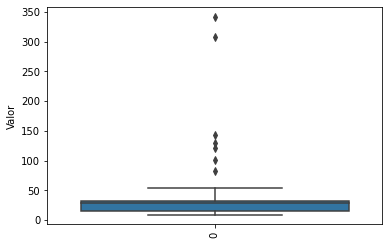

In [19]:
#Boxplot
df=hawksData['Hallux']

sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.ylabel('Valor')
plt.show()

Vemos que existen outliers en la variable Hallux. Todos son mayores que el máximo valor en el boxplot.

Obtenemos los registros de los outliers de la variable Hallux

In [20]:
#Obtenemos los registros de los outliers. 
def obtener_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]  #~
    return df_final

df=hawksData['Hallux']
df_hallux_sin_outliers = obtener_outlier_IQR(df)
df_hallux_sin_outliers

39     101.0
90     308.0
95     341.4
102    143.0
188     82.8
582    121.0
617    130.0
Name: Hallux, dtype: float64

La variables *Hallux* tiene 7 outliers.

Reemplazamos los outliers por el valor máximo, ya que todos los outliers soy mayores a este. 

In [21]:
#Obtenemos el maximo valor posible
Q1=hawksData['Hallux'].quantile(0.25)
Q3=hawksData['Hallux'].quantile(0.75)
IQR=Q3-Q1
max_quantile= Q3+1.5*IQR

#Reemplazamos los outliers por el maximo valor
hawksData['Hallux'] = np.where(hawksData['Hallux'] > max_quantile, max_quantile, hawksData['Hallux'])

#Imprimimos los outliers que han sido reemplazados por el maximo valor. 
hawksData['Hallux'][hawksData['Hallux'] == max_quantile ]

39     55.85
90     55.85
95     55.85
102    55.85
188    55.85
582    55.85
617    55.85
Name: Hallux, dtype: float64

Visualizamos la distribución de la variable Hallux, ahora sin outliers.

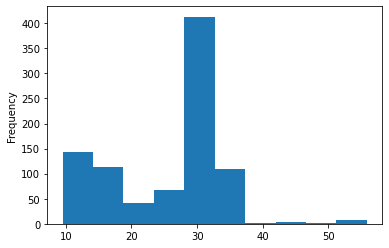

In [22]:
#Histograma de la varible Hallux sin outliers. 
ax = hawksData["Hallux"].plot.hist()

La distribucion de la variable *Hallux* es bimodal.

In [23]:
hawksData['Hallux'].fillna(hawksData['Hallux'].median(), inplace=True)

print("Numero actualizado de nulos en la variable Hallux: " + str(hawksData['Hallux'].isnull().sum()))

Numero actualizado de nulos en la variable Hallux: 0


## Covarianza y correlación 
### Covarianza

Creamos una matriz de covarianza de las 4 variables de interés

In [24]:
data = hawksData[['Wing', 'Weight', 'Culmen', 'Hallux' ]]
df = pd.DataFrame(data,columns=['Wing', 'Weight', 'Culmen', 'Hallux'])
covMatrix = pd.DataFrame.cov(df)
print (covMatrix)

                Wing         Weight       Culmen       Hallux
Wing     9071.065351   40560.149530   657.948927   707.270869
Weight  40560.149530  211802.821015  3162.877362  3405.360999
Culmen    657.948927    3162.877362    52.754465    55.563801
Hallux    707.270869    3405.360999    55.563801    75.237407


La covarianza entre las cuatro variables es positiva, lo que sugiere que las variables cambian en la misma dirección.

### Correlación 

Creamos una matriz de correlación de las 4 variables de interés

In [1]:
data = hawksData[['Wing', 'Weight', 'Culmen', 'Hallux' ]]
df = pd.DataFrame(data,columns=['Wing', 'Weight', 'Culmen', 'Hallux'])
corrMatrix = df.corr()
print (corrMatrix)

NameError: name 'hawksData' is not defined

La correlación entre las cuatro variables es alta, siendo la menor de 0.85 y la mayor 0.95. Lo que significa que podría ser posible usar una o dos variables para crear los clusters de las especies. 

## Standarización / Normalización

Ya limpios los datos de las variables de interés, al haber tratado los valores nulos y atípicos, ahora vamos a normalizar o estandarizar los datos para reducir todas las características a una escala común sin distorsionar las diferencias en el rango de los valores, así evitamos que una variable que esté en una escala superior tenga mayor peso.

Para eso vamos a utilizar StandardScaler para normalizar los datos basados en la desviación estándar, dando el resultado de las medias de las cuatro variables cero o un valor cercano a cero, y la desviación estándar uno o cercano a uno. 

In [26]:
data = hawksData[['Wing', 'Weight', 'Culmen', 'Hallux' ]]
scaler = StandardScaler()
scaler.fit(data)
hawksData_scaled = scaler.transform(data)
hawksDataVar = pd.DataFrame(hawksData_scaled)
hawksDataVar.columns =['Wing', 'Weight', 'Culmen', 'Hallux']
hawksDataVar

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#https://www.youtube.com/watch?v=Q9E8BTBA6IE&ab_channel=RitheshSreenivasan

,Wing,Weight,Culmen,Hallux
0,0.728048,0.316849,0.533113,0.529504
1,0.633500,0.338590,0.505562,0.448758
2,0.686027,0.469034,0.670869,0.667926
3,-0.532593,-0.661482,-0.431177,-0.231814
4,-1.162913,-1.313703,-1.285262,-1.293046
...,...,...,...,...
903,0.675521,1.632161,0.574440,0.241126
904,-1.320494,-1.302833,-1.257711,-1.166159
905,0.465414,0.034220,0.009641,0.241126
906,0.559962,0.186405,0.464235,0.287267


Decidimos estandarizar las variables porque así todas las características tienen la misma media y varianza, lo que facilita la comparación. También es menos sensible a valores atípicos extremos que el normalizador min-max. Además, conserva la distribución original. 

Fuente: https://mkang32.github.io/python/2020/12/27/feature-scaling.html#std 

In [27]:
hawksDataVar.describe()

,Wing,Weight,Culmen,Hallux
count,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02
mean,-1.655553e-16,4.401765e-17,-1.936777e-16,6.274961e-16
std,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00
min,-2.925710e+00,-1.561547e+00,-1.822510e+00,-1.846732e+00
25%,-1.194429e+00,-1.277287e+00,-1.243936e+00,-1.192113e+00
50%,5.704678e-01,4.255525e-01,5.055620e-01,4.487584e-01
75%,7.805746e-01,7.516630e-01,7.535223e-01,6.794609e-01
max,1.726055e+00,2.730066e+00,2.392815e+00,3.499799e+00


Podemos observar que las medias de las variables son un valor cercano a 0 y el valor de las desviaciones estándar es 1. 

# Modelado

## Busqueda de la cantidad óptima de clusters

### Within Cluster Sum of Squares 

Para saber el número adecuado de clusters utilizamos el método *elbow*, que consiste en ir creando diferentes cantidades de clusters y calcular que tan similares son las muestras dentro de los clusters. 
Recordemos que miestras mas similares sean las muestras, más distantes estarán los clusters que se forman, que es lo que buscamos en el clutering, la formación de grupos bien definidos que contengan muestras que sus disntancia entre sí sean la menor posible. Esta distancia se mide a través de la suma de los cuadrados dentro de cada grupo, lo que se llama WCSS (Within Cluster Sum of Squares) 

Fuente: https://www.youtube.com/watch?v=s6PSSzeUMFk 

In [28]:
#Calculamos que tan similares son las muestras dentro de los clusters.
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(hawksDataVar)  #Se aplica K-means en los datos de las 4 variables.
    wcss.append(kmeans.inertia_)

C:\Users\Erika Martinez\Anaconda\envs\Env R y Python\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


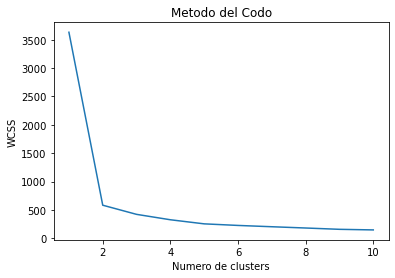

In [29]:
plt.plot(range(1, 11), wcss)
plt.title('Metodo del Codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')  #WCSS indica que tan similares son las muestras dentro de los clusteres.
plt.show()

Podemos visualizar que el número óptimo de clusters es 2, ya que es en ese punto donde se forma el codo. 

### Coeficiente de Silhouette
Usamos el Silhouette Score que es la media del coeficiente de Silhouette para todas las muestras. Recordemos que el coeficiente de Silhouette de una muestra es igual a (b-a)/max(a,b), donde a es la distancia media a las otras muestras en el mismo cluster y b es la distancia minima de la muestra a cualquier otra muestra del resto de clusters.

Fuentes:

https://www.youtube.com/watch?v=Qh7VxLsaU9M

https://www.youtube.com/watch?v=zQfEc7vA1gU 

In [30]:
kmeans_per_k = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(hawksDataVar)  #Se aplica K-means en los datos de las 4 variables.
    kmeans_per_k.append(kmeans.labels_)

silhouette_scores = []
for model in kmeans_per_k[1:]:
    score = silhouette_score(hawksDataVar, model)
    silhouette_scores.append(score)

C:\Users\Erika Martinez\Anaconda\envs\Env R y Python\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


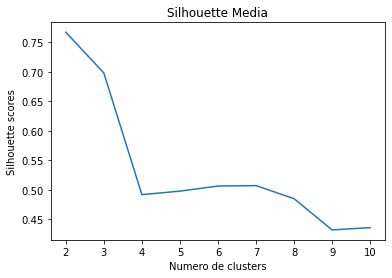

In [31]:
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Media')
plt.xlabel('Numero de clusters')
plt.ylabel('Silhouette scores')  #WCSS indica que tan similares son las muestras dentro de los clusteres.
plt.show()

Como podemos observar el método de la silueta indica que el número óptimo de clusters es 2. 

## Ejercicio 1
## Aplicación de K-Means
### K-Means con 2 clusters 

Con los resultados del Within Cluster Sum of Squares y el coeficiente de silueta, procedemos a utilizar 2 como el número de clusters para el modelo K-Means. 

In [32]:
#Creamos el modelo
clusteringKmeans1 = KMeans(n_clusters=2) 

#Aplicamos el modelo 
clusteringKmeans1.fit(hawksDataVar) 

#Los resultados se guardan en labels_, estos los colocamos en una nueva columna llamada KMeans_Clusters
hawksData["KMeans_Clusters"]=clusteringKmeans1.labels_ 

hawksData.head(5)

,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop,KMeans_Clusters
0,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN,1
1,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,25.5,29.4,221,NaN,NaN,NaN,NaN,NaN,1
2,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN,1
3,9,23,1992,10:50,,745-49508,CH,I,F,265.0,470.0,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN,0
4,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,170.0,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN,0


### Gráfico para las variables *Wing* y *Weight*

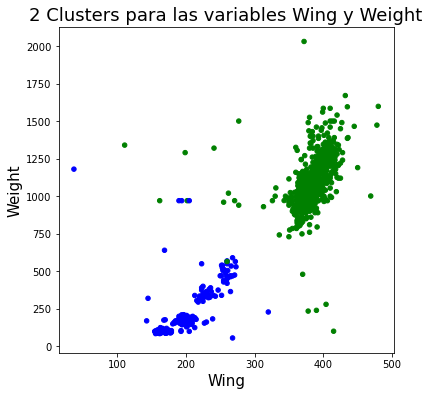

In [33]:
#Graficamos los clusters para las variables Wing y Weight
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Wing", fontsize=15)
ax.set_ylabel("Weight", fontsize=15)
ax.set_title("2 Clusters para las variables Wing y Weight", fontsize=18)

color_theme = np.array(["blue", "green"])
ax.scatter(x=hawksData["Wing"], y=hawksData["Weight"], c=color_theme[hawksData["KMeans_Clusters"]], s=20)

plt.show()

### Gráfico para las variables  *Culmen* y *Hallux* 

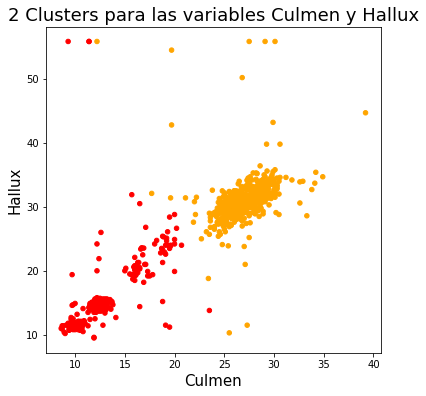

In [34]:
#Graficamos los clusters para las variables Culmen y Hallux
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Culmen", fontsize=15)
ax.set_ylabel("Hallux", fontsize=15)
ax.set_title("2 Clusters para las variables Culmen y Hallux", fontsize=18)

color_theme = np.array(["red", "orange"])
ax.scatter(x=hawksData["Culmen"], y=hawksData["Hallux"], c=color_theme[hawksData["KMeans_Clusters"]], s=20)

plt.show()

### Gráfico para las variables *Wing*  y *Culmen* 

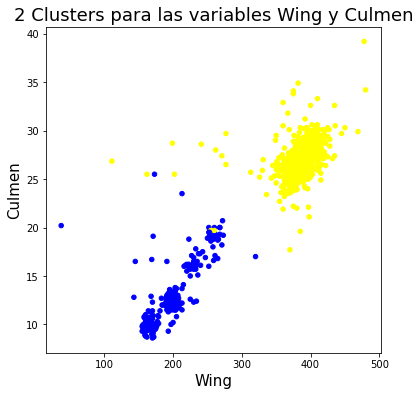

In [35]:
#Graficamos los clusters para las variables Wing y Culmen
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Wing", fontsize=15)
ax.set_ylabel("Culmen", fontsize=15)
ax.set_title("2 Clusters para las variables Wing y Culmen", fontsize=18)

np.random.seed(10)
color_theme = np.array(["blue", "yellow"])
ax.scatter(x=hawksData["Wing"], y=hawksData["Culmen"], c=color_theme[hawksData["KMeans_Clusters"]], s=20)

plt.show()

Las medidas de *Wing* y *Culmen* parecen lograr mejores resultados al dividir las dos especies de alcones. El grupo formado por los puntos amarillos que ha encontrado el algoritmo coincide con la especie *RT*, mientras los puntos azules parecen estar confomados por las especies *CH* y *SS*. K-Means nos sugiere agrupar las muestras en 2 clusters, pero el dataset nos indica que existen 3 especies. Por lo que se las especies *CH* y *SS* han sido unidas en un solo cluster.

Para entender los grupos que se han formado, se puede darles un nombre. Cómo por ejemplo:  
 
 - Grupo 1: Sólo *RT* (color azul)  
 - Grupo 2: Combinacion de *CH* y *SS* (color amarillo)  

**P.S. Los colores cambian, *RT* puede que no sea color azul al ejecutar el código**

Evaluacion del modelo para 2 clusters

In [36]:
score = silhouette_score(hawksDataVar, clusteringKmeans1.labels_)
print('Silhouette Score para K-Means 2 clusters: %.3f' % score)

Silhouette Score para K-Means 2 clusters: 0.767


Silhouette es una medida de la calidad del agrupamiento que determina que tan bien se encuentra cada objeto dentro de su grupo, un valor alto en la silueta promedio implica un buen agrupamiento (Los valores van de -1 a 1). 

### K-Means con 3 clusters

A pesar de que el número óptimo de clusters nos dió 2 utilizando algunas técnicas. Vamos a probar con 3 clusters, debido a que sabemos que existen 3 especies según el dataset. 

In [37]:
#Creamos el modelo
clusteringKmeans2 = KMeans(n_clusters=3) 

#Aplicamos el modelo 
clusteringKmeans2.fit(hawksDataVar) 

#Los resultados se guardan en labels_, estos los colocamos en una nueva columna llamada KMeans_Clusters
hawksData["KMeans_Clusters3"]=clusteringKmeans2.labels_ 

hawksData.head(10)

,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,...,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop,KMeans_Clusters,KMeans_Clusters3
0,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,...,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN,1,0
1,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,...,25.5,29.4,221,NaN,NaN,NaN,NaN,NaN,1,0
2,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,...,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN,1,0
3,9,23,1992,10:50,,745-49508,CH,I,F,265.0,...,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN,0,2
4,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,...,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN,0,1
5,9,28,1992,11:25,,1207-55910,RT,I,NaN,412.0,...,28.5,32.2,230,NaN,NaN,NaN,NaN,NaN,1,0
6,9,28,1992,13:30,,877-76320,RT,I,NaN,370.0,...,25.3,30.1,212,NaN,NaN,NaN,NaN,NaN,1,0
7,9,29,1992,11:45,,877-76321,RT,A,NaN,375.0,...,27.2,30.0,243,NaN,NaN,NaN,NaN,NaN,1,0
8,9,29,1992,15:35,,877-76322,RT,A,NaN,412.0,...,29.3,31.3,210,NaN,NaN,NaN,NaN,NaN,1,0
9,9,30,1992,13:45,,1207-55911,RT,I,NaN,405.0,...,26.0,30.2,238,NaN,NaN,NaN,NaN,NaN,1,0


Gráfico para las variables *Wing*  y *Culmen* 

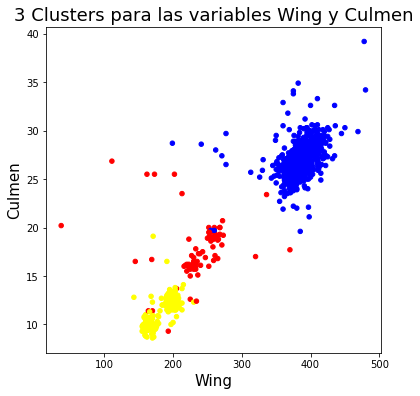

In [38]:
#Graficamos los clusters para las variables Wing y Culmen
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Wing", fontsize=15)
ax.set_ylabel("Culmen", fontsize=15)
ax.set_title("3 Clusters para las variables Wing y Culmen", fontsize=18)

np.random.seed(10)
color_theme = np.array(["blue" , "yellow", "red"])
ax.scatter(x=hawksData["Wing"], y=hawksData["Culmen"], c=color_theme[hawksData["KMeans_Clusters3"]], s=20)

plt.show()

Para 3 clusters, K-Means ha asignado bien la mayoría de las muestras. Solo 12 de las muestras que pertenecen a *SS*, 4 de las muestras de *RT*, y 4 de las muestras de *CH* han sido mal etiquetadas. 

Creando los grupos:

- Grupo 1: Sólo RT (color azul)
- Grupo 2: Solo SS (color amarillo)
- Grupo 3: Solo CH (color rojo)

Evaluacion del modelo para 3 clusters

In [39]:
score = silhouette_score(hawksDataVar, clusteringKmeans2.labels_)
print('Silhouette Score para K-Means 3 clusters: %.3f' % score)

Silhouette Score para K-Means 3 clusters: 0.698


## Ejercicio 2

## Aplicación de DBSCAN

Como sabemos de antemano que existen 3 especies de alcones en el dataset, nos aseguramos que los parametros (epsilon y minPts) de DBSCAN den como resultado la formación de 4 clusters (3 grupos y 1 de outliers). 

Para probar hemos escogido dos conjuntos de parametros. Uno que tiene eps=0.7 y min_samples=45, y el segundo con eps=0.55 y min_samples=15. Los dos modelos, como ya mencionamos, dan un total de 4 clusters. 

### Modelos DBSCAN 1

In [40]:
#Modelo DBSCAN 1
clusteringDBSCAN1 = DBSCAN(eps=0.7, min_samples=45).fit(hawksDataVar)
cluster = clusteringDBSCAN1.labels_
print("El numero de clusters (incluidos los outliers) es: " + str(len(set(cluster))))

El numero de clusters (incluidos los outliers) es: 4


Gráfica del primer modelo de DBSCAN (eps=0.7 y min_samples=45)

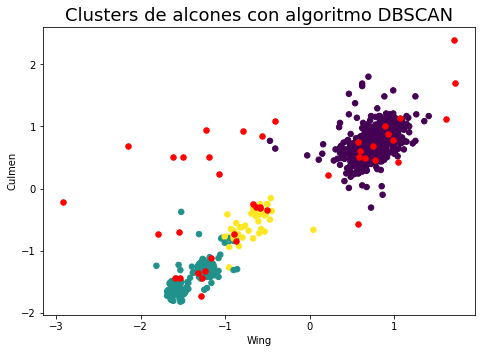

In [41]:
#Separar outliers de clusters
outliers_df = hawksDataVar[clusteringDBSCAN1.labels_ == -1]
clusters_df = hawksDataVar[clusteringDBSCAN1.labels_ != -1]

np.random.seed(10)
colors = clusteringDBSCAN1.labels_
colors_clusters = colors[colors != -1]
color_outliers = "red"

#Graficar clusters y outliers
fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])

ax.scatter(clusters_df["Wing"], clusters_df["Culmen"], c = colors_clusters, s=30)
ax.scatter(outliers_df["Wing"], outliers_df["Culmen"], c = color_outliers, s=30)

ax.set_xlabel("Wing")
ax.set_ylabel("Culmen")
plt.title("Clusters de alcones con algoritmo DBSCAN", fontsize=18)

plt.show()

#Fuente: https://www.youtube.com/watch?v=eq1zKgCFwkk 

Creando los grupos:

- Grupo 1: Sólo RT (color morado oscuro)
- Grupo 2: Solo SS (color verde)
- Grupo 3: Solo CH (color amarillo )


- Grupo 4: Outliers (color rojo)

Evaluacion del modelo para DBSCAN 1

In [42]:
score = silhouette_score(hawksDataVar, clusteringDBSCAN1.labels_)
print('Silhouette Score para DBSCAN 1: %.3f' % score)

Silhouette Score para DBSCAN 1: 0.660


### Modelo DBSCAN 2

In [43]:
#Modelo DBSCAN 2
clusteringDBSCAN2 = DBSCAN(eps=0.55, min_samples=15).fit(hawksDataVar)
cluster = clusteringDBSCAN2.labels_
print("El numero de clusters (incluidos los outliers) es: " + str(len(set(cluster))))

El numero de clusters (incluidos los outliers) es: 4


Gráfica del segundo modelo de DBSCAN (eps=0.55 y min_samples=15)

In [1]:
#Separar outliers de clusters
outliers_df = hawksDataVar[clusteringDBSCAN2.labels_ == -1]
clusters_df = hawksDataVar[clusteringDBSCAN2.labels_ != -1]

np.random.seed(10)
colors = clusteringDBSCAN2.labels_
colors_clusters = colors[colors != -1]
color_outliers = "red"

#Graficar clusters y outliers
fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])

ax.scatter(clusters_df["Wing"], clusters_df["Culmen"], c = colors_clusters, s=30)
ax.scatter(outliers_df["Wing"], outliers_df["Culmen"], c = color_outliers, s=30)

ax.set_xlabel("Wing")
ax.set_ylabel("Culmen")
plt.title("Clusters de alcones con algoritmo DBSCAN", fontsize=18)

plt.show()

NameError: name 'hawksDataVar' is not defined

Creando los grupos:

- Grupo 1: Sólo RT (color morado oscuro)
- Grupo 2: Solo SS (color amarillo)
- Grupo 3: Solo CH (color verde)



- Grupo 4: Outliers (color rojo)

Como podemos observar con las dos gráficas resultantes, hay variabilidad en la designación de las muestras a los diferentes clusters. El segundo modelo que tiene epsilon y minPts menores, por ejemplo, asigna algunas muestras como outliers que en el primer modelo son parte de los clusters de especies. 

Evaluacion del modelo para DBSCAN 2

In [2]:
score = silhouette_score(hawksDataVar, clusteringDBSCAN2.labels_, metric='euclidean')
print('Silhouette Score para DBSCAN 2: %.3f' % score)

NameError: name 'silhouette_score' is not defined

## Aplicación de OPTICS

Contruimos el modelo

In [46]:
optics_clustering = OPTICS(min_samples=10, xi = 0.05, min_cluster_size = 0.05).fit(hawksDataVar)
labels = optics_clustering.labels_

Evaluacion del modelo OPTICS

In [47]:
score = silhouette_score(hawksDataVar, optics_clustering.labels_, metric='euclidean')
print('Silhouette Score para OPTICS: %.3f' % score)

Silhouette Score para OPTICS: 0.664


Almacenamos de los resultados del entrenamiento.

In [48]:
# Creamos las etiquetas según la técnica DBSCAN con eps = 0.5
labels1 = cluster_optics_dbscan(reachability = optics_clustering.reachability_, 
                                core_distances = optics_clustering.core_distances_, 
                                ordering = optics_clustering.ordering_, eps = 0.5)
  
# Creamos las etiquetas según la técnica DBSCAN con eps = 2.0
labels2 = cluster_optics_dbscan(reachability = optics_clustering.reachability_, 
                                core_distances = optics_clustering.core_distances_,
                                ordering = optics_clustering.ordering_, eps = 2)

# Creamos una matriz numpy con números en espacios iguales hasta el rango especificado
space = np.arange(len(hawksDataVar))
  
# Almacenamos la reachability distance de cada punto
reachability =optics_clustering.reachability_[optics_clustering.ordering_]
  
# Almacenamos las etiquetas del clúster de cada punto
labels = optics_clustering.labels_[optics_clustering.ordering_]


Visualizamos los resultados

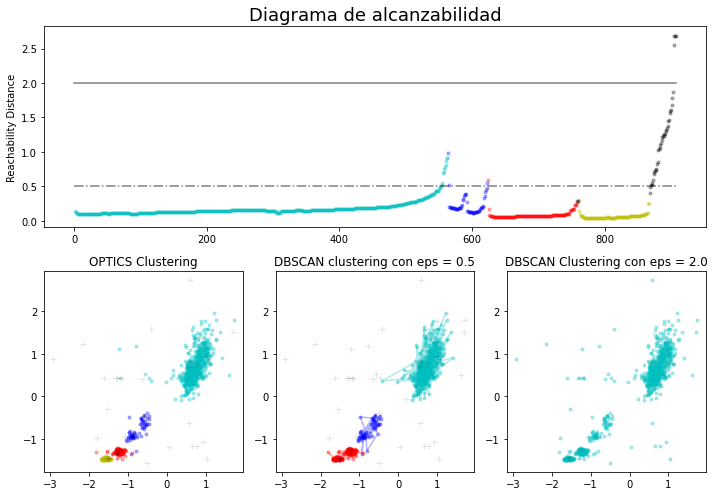

In [49]:
#Grafica de optics
# Definimos el marco de la visualización
plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])
  
# Dibujamos el diagrama de alcanzabilidad
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Diagrama de alcanzabilidad', fontsize=18)

# Dibujamos el  OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = hawksDataVar[optics_clustering.labels_ == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
      
ax2.plot(hawksDataVar.iloc[optics_clustering.labels_ == -1, 0],
        hawksDataVar.iloc[optics_clustering.labels_ == -1, 1],
       'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')
  
# Dibujamos el DBSCAN Clustering con eps = 0.5
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
    Xk = hawksDataVar[labels1 == Class]
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')
        
ax3.plot(hawksDataVar.iloc[labels1 == -1, 0],
        hawksDataVar.iloc[labels1 == -1, 1],
       'k+', alpha = 0.1)
ax3.set_title('DBSCAN clustering con eps = 0.5')
  
# Dibujamos el DBSCAN Clustering con eps = 2.0
colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
    Xk = hawksDataVar.iloc[labels2 == Class]
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
          
ax4.plot(hawksDataVar.iloc[labels2 == -1, 0],
        hawksDataVar.iloc[labels2 == -1, 1],
       'k+', alpha = 0.1)
ax4.set_title('DBSCAN Clustering con eps = 2.0')

plt.tight_layout()
plt.show()

#Fuente: 
#https://www.geeksforgeeks.org/ml-optics-clustering-implementing-using-sklearn/ 
#https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py 

Podemos observar el diagrama de alcanzabilidad donde los valles representan clusters (cuando mas profundo es el valle mas denso es el cluster), mientras que las cimas indican los puntos que están entre las agrupaciones (cadidatos a ser considerardos *outliers*).

En la gráfica de scatterplot de OPTICS vemos que el algoritmo ha producido 4 clusters de acuerdo a la densidad de las muestras. 

Por otra parte, si extraemos una agrupación de la ordenación realizada por OPTICS similar a lo que DBSCAN hubiera generado estableciendo el parámetro eps=0.5 obtenemos 3 clusters, y con eps=2.0 solo un cluster (el epsilon es demasiado grande). 

## Ejercicio 3

### Comparación de resultados en k-means y DBSCAN.
El algoritmo K-Means lo usamos para 2 y 3 clusters. Para 2 clusters el resultado de evaluación de calidad de agrupamiento fue del 0.767 y para 3 clusters fue de 0.698.
Para DBSCAN escogimos los parametros con el conocimiento de que se debe obtener 3 clusters. Basado en esto, escogemos el primer modelo DBSCAN con parametros de eps=0.7 y min_samples=45, el cual obtuvo un 0.66. Mientras que en el segundo modelo con parámetros eps=0.55 y min_samples=15 se obtuvo el 0.671.
Para el algoritmo OPTICS se obtiene un 0.664.
De esta manera podemos ver, que el modelo que tuvo un mejor resultado en calidad de agrupamiento es K-Means para 2 clusters. 

### Pros y contras de los algoritmos
Los diferentes algoritmos tienen sus ventajas y desventajas. En el caso de K-Means, se necesita establecer el número de clusters que deseamos obtener. Por otro lado, con DBSCAN esto no es necesario ya que se obtiene sabiendo la alta o baja densidad de concentración de puntos en diferentes zonas. Sin embargo, lo que si es necesario en DBSCAN para determinar la densidad adecuada es el establecer los parámetros como epsilon (ε) y el mínimo número de puntos en la ε-vecindad de un punto (minPts). Saber que parámetros escoger depende del conocimiento de dominio, el algoritmo y conjunto de datos. Adicionalmente, DBSCAN forma clusters que pueden tener forma arbitraria y pueden no tener el mismo tamaño de característica, a diferencia de K-Means en donde los clusters son de forma más o menos esférica o convexa y deben tener el mismo tamaño de característica.

### Conclusiones
Recordemos que la media de los coeficientes de silueta, que es la medida escogida en este análisis para evaluar la calidad del agrupamiento, indica que tan bien o mal están agrupadas las diferentes muestras a su cluster. Basandonos en esta medida, el mejor resultado fue al usar K-means con 2 clusters. A pesar de que sabemos que existen 3 especies en el conjunto de datos, las diferentes decisiones a lo largo del análisis ya sea en el preprocesamiento de los datos como en la creación y ejecución del modelos o el escoger silhouette Score como el método de evaluación, determinan el resultado obtenido. 